# Using Python for Research Homework: Week 4, Case Study 2

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset.

In [2]:
# DO NOT EDIT THIS CODE
import pandas as pd
import numpy as np
birddata = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@bird_tracking.csv", index_col=0)
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


### Exercise 1

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset. We will group the flight patterns by bird and date, and plot the mean altitude for these groupings.

`pandas` makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in the dataframe. In this exercise, we will group the dataframe by `birdname` and then find the average `speed_2d` for each bird.

#### Instructions 
- Fill in the code to find the mean altitudes of each bird using the pre-loaded `birddata` dataframe. 

In [3]:
# First, use `groupby()` to group the data by "bird_name".
grouped_birds = birddata.groupby("bird_name")
grouped_birds.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric
19795,382,2013-08-15 00:20:45+00,864,145.179141,50.213455,4.394506,16.482439,Nico
19796,197,2013-08-15 00:51:00+00,864,-25.393443,50.214117,4.394010,0.360555,Nico
19797,206,2013-08-15 01:21:08+00,864,158.480445,50.213713,4.393788,0.193132,Nico
19798,200,2013-08-15 01:50:57+00,864,139.613245,50.213546,4.393801,0.800999,Nico
19799,199,2013-08-15 02:20:48+00,864,-134.485593,50.213601,4.393882,1.268267,Nico


In [5]:
# Now calculate the mean of `speed_2d` using the `mean()` function.
mean_speeds = grouped_birds.speed_2d.mean()
mean_speeds

bird_name
Eric     2.300545
Nico     2.908726
Sanne    2.450434
Name: speed_2d, dtype: float64

In [6]:
# Find the mean `altitude` for each bird.
mean_altitudes = grouped_birds.altitude.mean()
mean_altitudes

bird_name
Eric     60.249406
Nico     67.900478
Sanne    29.159922
Name: altitude, dtype: float64

### Exercise 2

In this exercise, we will group the flight times by date and calculate the mean altitude within that day.

#### Instructions 
- Convert `birddata.date_time` to the `pd.datetime` format, extract the date, and store it as `birddata["date"]`.
- Fill in the code to find the mean altitudes for each day.

What is the mean altitude of the birds on 2013-09-12? (Hint: You will need to convert this to a datetime object as well, extract the date, and then use this to index into the dataframe.)

In [7]:
# Convert birddata.date_time to the `pd.datetime` format.
birddata.date_time = pd.to_datetime(birddata.date_time)

# Create a new column of day of observation
birddata["date"] = birddata.date_time.dt.date
birddata.date.head()

0    2013-08-15
1    2013-08-15
2    2013-08-15
3    2013-08-15
4    2013-08-15
Name: date, dtype: object

In [9]:
# Use `groupby()` to group the data by date.
grouped_bydates = birddata.groupby("date")

# Find the mean `altitude` for each date.
mean_altitudes_perday = grouped_bydates.altitude.mean()
mean_altitudes_perday

date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
2013-08-20    184.461224
2013-08-21    171.546185
2013-08-22    114.172691
2013-08-23    144.716049
2013-08-24    101.446721
2013-08-25     93.162602
2013-08-26     75.995951
2013-08-27     84.591093
2013-08-28    111.210526
2013-08-29    177.421488
2013-08-30     92.520161
2013-08-31    160.975904
2013-09-01     84.753086
2013-09-02     88.128514
2013-09-03     93.975709
2013-09-04     90.717213
2013-09-05     87.264000
2013-09-06     89.020492
2013-09-07    103.412955
2013-09-08     76.566265
2013-09-09     81.483471
2013-09-10     90.618852
2013-09-11     77.222672
2013-09-12     75.646091
2013-09-13     66.615079
                 ...    
2014-04-01    115.797571
2014-04-02     13.589431
2014-04-03     26.772727
2014-04-04    101.441667
2014-04-05     96.995536
2014-04-06     13.426540
2014-04-07     27.105000
2014-04-08      9.597087
2014-04-09     22.84

### Exercise 3

In this exercise, we will group the flight times by both bird and date, and calculate the mean altitude for each.

#### Instructions 
- `birddata` already contains the `date` column. To find the average speed for each bird and day, create a new grouped dataframe called `grouped_birdday` that groups the data by both `bird_name` and date.

In [10]:
# Use `groupby()` to group the data by bird and date.
grouped_birdday = birddata.groupby(["bird_name", 'date'])

# Find the mean `altitude` for each bird and date.
mean_altitudes_perday = grouped_birdday.altitude.mean()
mean_altitudes_perday.head()

bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
Name: altitude, dtype: float64

### Exercise 4

Great! Now find the average speed for each bird and day.

#### Instructions 

- Store these are three `pandas` `Series` objects, one for each bird.
- Use the plotting code provided to plot the average speeds for each bird.

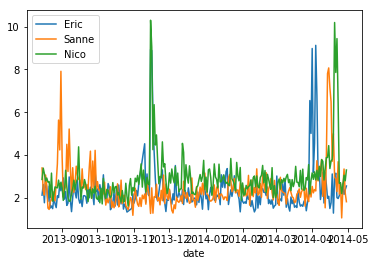

In [12]:
import matplotlib.pyplot as plt

eric_daily_speed  = grouped_birdday.speed_2d.mean()['Eric']
sanne_daily_speed = grouped_birdday.speed_2d.mean()['Sanne']
nico_daily_speed  = grouped_birdday.speed_2d.mean()['Nico']

eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.savefig("Speed_Birds2.pdf")
plt.show()